# Linear Algebra with Numpy
黄松霖

这个Notebook将会带领大家使用`Numpy`演练我们在线性代数中学习到的知识，并且了解我们应如何应用Numpy解决线性代数问题，这包括：
* 向量和矩阵的乘积
* 线性方程组的求解
* 行列式与特征值

## 乘积们
向量或矩阵的乘积包含：
* 点积 dot product
* 叉积 cross product
* 矩阵乘法 matrix multiplication
* 内积 inner product
* 外积 outer product
* 张量积 tensor product

In [1]:
import numpy as np

In [30]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

在矩阵运算中，最简单的积是对应元素积，也即，每个位置的数乘以对应位置的数，在Numpy中，这以`*`运算符给出：

In [31]:
a * b

array([ 4, 10, 18])

In [34]:
# c is output
c = np.zeros(a.shape[0])
for i in range(a.shape[0]):
    c[i] = a[i] * b[i]
    
c

array([ 4., 10., 18.])

点积即是每个位置的数乘以相应的位置的数的和，可以理解为：对应元素积内容的求和

In [3]:
np.dot(a, b)

32

In [32]:
np.sum(a * b)

32

叉积是一个较为特殊的操作，会返回一个长度是$|a||b|sin\theta$，而方向垂直于a和b，并满足右手定则的向量，具体计算方式请参考后续的行列式部分：

In [4]:
np.cross(a, b)

array([-3,  6, -3])

我们不妨验证一下：叉乘的结果是垂直于a和b的

In [5]:
np.dot(a, np.cross(a, b))

0

In [6]:
np.dot(b, np.cross(a, b))

0

矩阵乘法在Numpy中以`matmul`函数呈现，但是需要满足很多前置条件，也即第一个矩阵的行长度必须与第二个矩阵的列长度相匹配，因为新矩阵的(2, 1)是原本左侧矩阵的第二行分别乘以右侧矩阵第二列中某一列（可以理解为做了一次dot操作）：

In [7]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])

In [8]:
np.matmul(a, b)

array([[19, 22],
       [43, 50]])

这个matmul函数可以等同于下面这个代码块：（下面那个代码块不是最优实现）

In [11]:
# c is the result matrix
c = np.zeros((a.shape[0], b.shape[1]))
for i in range(a.shape[0]):
    for j in range(b.shape[1]):
        c[i][j] = np.dot(a[i, :], b[:, j])
c

array([[19., 22.],
       [43., 50.]])

因为矩阵运算实在太常用了，所以`numpy`为我们提供了`@`运算符作为语法糖

In [9]:
a @ b

array([[19, 22],
       [43, 50]])

其实向量的乘积还有内外积之分：

In [12]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

In [13]:
np.inner(a, b)

32

注意到了吗，其实`inner`函数和`dot`在大多数时候的表现都是完全一致的：

In [14]:
np.dot(a, b)

32

In [15]:
a = np.array([[1], [2], [3]])
b = np.array([[4], [5], [6]])
np.inner(a, b)

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

In [16]:
np.dot(a, b)

ValueError: shapes (3,1) and (3,1) not aligned: 1 (dim 1) != 3 (dim 0)

但是这样又不一致了，`np.dot()`还报错了，这是因为`np.inner`函数的本质是返回$AB^T$，也就是A和B的转置的矩阵乘法

而inner函数则对矩阵的第一维度有要求，不能为除1以外的数

In [17]:
np.matmul(a, b.T)

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

In [21]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

十分相似的，`outer`外积的本质是返回$A^TB$，也即A的转置于B的矩阵乘法

In [22]:
np.outer(a, b)

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

In [26]:
a = np.array([[1, 2, 3]])
b = np.array([[4, 5, 6]])
np.matmul(a.T, b)

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

之所以我们称为内积与外积是因为一般我们会将向量写为(1, 2, 3)，除非你是竖着写字hh，那这个情况下，`np.inner(a, b)`会返回一个数，好像把向量向内压缩了，`np.outer(a, b)`会返回一个矩阵，好像向外扩展了

## 求解线性方程组
Numpy在`linalg`中为我们提供了求解线性方程组的工具

In [35]:
from numpy import linalg

要使用Numpy求解线性方程组，你需要先将方程组转化为系数矩阵和因变量矩阵，比如对于：$x+2y-4=0$ and $2x+y-8=0$这个方程组，你需要：
1. 先将常数项归为右侧，它是我们需要的因变量矩阵，比如这里是((4), (8))
2. 将系数提取出来，系数也即x, y前的数，请务必注意：x, y的顺序要保持一定！其次注意对于系数为0的情况，我们在数学中常常不写这一项，但是在系数矩阵中，0必须得到体现，比如此时系数矩阵应为((1, 2), (2, 1))---你的解顺序为x, y或者((2, 1), (1, 2))---你的解顺序为y, x
在做完这些之后，我们使用linalg.solve函数完成求解

In [36]:
a = np.array([[1, 2], [2, 1]])
b = np.array([[4], [8]])
linalg.solve(a, b)

array([[4.],
       [0.]])

实际上，为什么需要做上述两步是为了将方程转化为线性表示，也即$Ax=b$，A是系数矩阵，b是因变量矩阵，而x是我们需要的解。

然后，让我们来思考一下，如果我们可以求得A的逆，也即某个矩阵使得$A^IA=1$，也即乘上这个矩阵后，A的效果可以被消除，那么$Ax=b$的左侧将只剩下x，方程得到了解，但是注意方程的右侧也需要乘上这个相应的$A^I$，这就是上述`solve`函数求解的本质。

要得到这个逆，我们需要会高斯消元法的拓展，不必担心，`Numpy`为我们提供了相应的函数

In [37]:
linalg.inv(a)

array([[-0.33333333,  0.66666667],
       [ 0.66666667, -0.33333333]])

我们可以测试一下解是否是$A^IB$:

In [38]:
np.matmul(linalg.inv(a), b)

array([[4.],
       [0.]])

## 行列式与特征值
行列式（determinant，只对方阵定义）是一个对于矩阵性质具有特殊意义的值，它有很多应用，不限于：
* 行列式为0的矩阵没有逆，行列式可以指示矩阵求逆运算
* 行列式的绝对值是矩阵中每个行，在对应维度空间中展开，所产生的面积，体积的值

In [40]:
a = np.array([[1, 2], [3, 4]])

In [41]:
linalg.det(a)

-2.0000000000000004

这个值其实是1x4-2x3=-2，也就是两条“对角线”乘积之差（可以理解为画一个叉），从左上到右下的对角线为正，另一个为负。请注意这里的对角线是带引号的，矩阵中我们严格来说只认为左上到右下的那条才是对角线。

在3x3矩阵中，这更为复杂，我们需要先降到2x2，具体如何做？选一条水平线，比如第一条，其上每一个值乘以对应的2x2矩阵对角线，然后以一个特殊方式相加，即可得到答案，比如说：

In [42]:
a = np.arange(9).reshape(3, -1)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

比如我们选择水平线0，1，2， 那么0对应的是2x2小矩阵((4, 5), (7, 8))，1对应的是((3, 5), (6, 8))，2对应的是((3, 4), (6, 7))，而且注意他们的符号是根据相应位置的序号和（如果是偶数为-，奇数为+）...将他们这样加起来之后，我们就可以得到答案了，

In [43]:
linalg.det(a)

0.0

In [44]:
0*(4*8-7*5)-1*(3*8-5*6)+2*(3*7-4*6)

0

因为这个矩阵的行列式为0，所以它没有逆，不妨试试：

In [45]:
linalg.inv(a)

LinAlgError: Singular matrix

Singular Matrix也就是说这个矩阵没有逆，因为某些行混合可以得到另一个行，比如a的第一行乘以-1加上a的第二行乘以2即可得到第三行，这样的方程，其实只有两个等式却有三个未知数，没法解，所以没有逆

In [46]:
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [47]:
a[0, :]*-1 + a[1, :]*2

array([6, 7, 8])

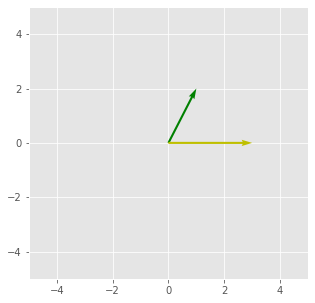

In [79]:
import matplotlib.pyplot as plt
import numpy as np
fig=plt.figure(figsize=(5, 5))
plt.style.use('ggplot')
plt.quiver(0, 0, 1, 2, angles='xy', scale_units='xy', scale=1, color='g')
plt.quiver(0, 0, 3, 0, angles='xy', scale_units='xy', scale=1, color='y')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.show()

那么这个拓展出的平行四边形就是：

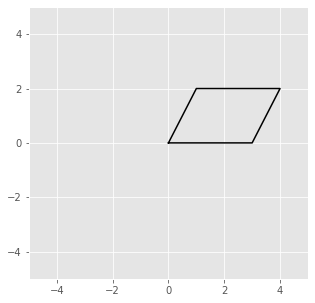

In [81]:
fig=plt.figure(figsize=(5, 5))
plt.plot([0, 1, 4, 3, 0], [0, 2, 2, 0, 0], color='black')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.show()

很清楚的我们知道这个四边形的面积是：3 * 2=6，而对应的行列式绝对值为

In [83]:
abs(linalg.det(np.array([[1, 2], [3, 0]])))

6.0

### 特征值
在代数空间的角度来看，矩阵的乘法其实是一种线性变换，这可以表示为一种旋转，比如说：

[[-4]
 [ 3]]


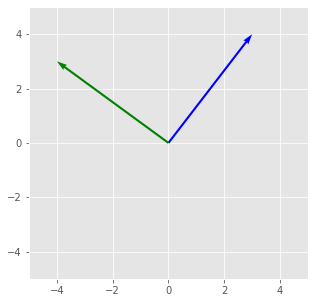

In [63]:
fig=plt.figure(figsize=(5, 5))
#绘制从[0,0]到[3, 4]的向量
B = np.array([[3], [4]])
plt.quiver(0, 0, B[0, 0], B[1, 0], angles='xy', scale_units='xy', scale=1, color='b')
A = np.array([[0, -1], [1, 0]])
#绘制从[0,0]到矩阵乘法结果的向量
print(np.matmul(A, B))
plt.quiver(0, 0, np.matmul(A, B)[0, 0], np.matmul(A, B)[1, 0], angles='xy', scale_units='xy', scale=1, color='g')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.show()

这个矩阵乘法的意义是将矩阵逆时针旋转了90度，站在向量空间的角度，那么有没有一些特殊的向量能够使得在矩阵乘法之后保持不变呢？我们可以试试用`linalg.eig`方法来寻找：

In [64]:
a = np.array([[1, 2], [3, 4]])
linalg.eig(a)

(array([-0.37228132,  5.37228132]),
 array([[-0.82456484, -0.41597356],
        [ 0.56576746, -0.90937671]]))

可以看到我们找到了两个特征值-0.37228132和5.37228132以及对应的特征向量

[[ 0.30697008]
 [-0.21062468]]


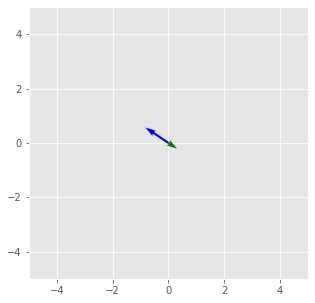

In [65]:
fig=plt.figure(figsize=(5, 5))
#绘制从[0,0]到[3, 4]的向量
B = np.array([[-0.82456484], [0.56576746]])
plt.quiver(0, 0, B[0, 0], B[1, 0], angles='xy', scale_units='xy', scale=1, color='b')
A = a
#绘制从[0,0]到矩阵乘法结果的向量
print(np.matmul(A, B))
plt.quiver(0, 0, np.matmul(A, B)[0, 0], np.matmul(A, B)[1, 0], angles='xy', scale_units='xy', scale=1, color='g')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.show()

注意到完全相反其实也是方向得到了保留，那么这个相乘后的向量和原向量有什么关系呢？其实就是乘以特征值：

In [66]:
B = np.array([[-0.82456484], [0.56576746]])
B

array([[-0.82456484],
       [ 0.56576746]])

In [67]:
np.matmul(A, B)

array([[ 0.30697008],
       [-0.21062468]])

In [68]:
-0.37228132*B

array([[ 0.30697009],
       [-0.21062466]])

所以特征值（以$\lambda$表示）和特征向量(x)其实就是一组特殊的值使得$Ax=\lambda x$

这具有一个很深刻的意义：

In [69]:
a = np.arange(9).reshape(3, -1)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [70]:
b, c = linalg.eig(a)
c 

array([[ 0.16476382,  0.79969966,  0.40824829],
       [ 0.50577448,  0.10420579, -0.81649658],
       [ 0.84678513, -0.59128809,  0.40824829]])

In [72]:
d = np.array([[b[0], 0, 0], [0, b[1], 0], [0, 0, b[2]]])
d

array([[ 1.33484692e+01,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.34846923e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.48477279e-16]])

In [73]:
c @ d @ linalg.inv(c)

array([[6.24720935e-16, 1.00000000e+00, 2.00000000e+00],
       [3.00000000e+00, 4.00000000e+00, 5.00000000e+00],
       [6.00000000e+00, 7.00000000e+00, 8.00000000e+00]])

注意到，这个值又返回了a！也就是我们可以得到一个式子:$A=PDP^{-1}$，其中P是我们特征值分解得到的特征向量矩阵，D则是一个对角线为特征值的矩阵，这样乘出来之后我们又能得到A本身，这个算法可以用于求A的n次方，想象一下，对于一个只有对角线元素的矩阵，他的n次方其实就是对角线元素的n次方，不需要管第n行乘以第m列，这就是一个算法的优化

请注意要这么做，你的特征值需要归一化，不然会有放缩问题

### 其他
numpy还提供了一些有趣的函数，这些知识不做硬性要求

#### QR分解
QR分解能将矩阵分成一个上三角矩阵和一个正交矩阵，这有助于求解线性回归方程

In [48]:
a = np.arange(9).reshape(3, -1)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [49]:
linalg.qr(a)

(array([[ 0.        ,  0.91287093,  0.40824829],
        [-0.4472136 ,  0.36514837, -0.81649658],
        [-0.89442719, -0.18257419,  0.40824829]]),
 array([[-6.70820393e+00, -8.04984472e+00, -9.39148551e+00],
        [ 0.00000000e+00,  1.09544512e+00,  2.19089023e+00],
        [ 0.00000000e+00,  0.00000000e+00, -8.88178420e-16]]))

### SVD分解
SVD分解可以快速提取矩阵的重要信息，这些信息将会在后续的PCA，主成分分析中被提及

In [50]:
a = np.arange(6).reshape(3, -1)
a

array([[0, 1],
       [2, 3],
       [4, 5]])

In [51]:
linalg.svd(a)

(array([[-0.10818576,  0.90643763,  0.40824829],
        [-0.48733624,  0.30957507, -0.81649658],
        [-0.86648672, -0.28728749,  0.40824829]]),
 array([7.38648213, 0.66323581]),
 array([[-0.6011819 , -0.79911221],
        [-0.79911221,  0.6011819 ]]))

### Trace
在很多时候，我们希望得到对角线上的元素和，`numpy`有提供对应的`trace`方法

In [52]:
a = np.arange(16).reshape(4, -1)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [53]:
np.trace(a)

30

### 乘方
其实矩阵的乘方可以被特征值分解优化，这就是为什么`numpy`提供了对应的`linalg.matrix_power`方法

In [54]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [55]:
linalg.matrix_power(a, 3)

array([[ 1680,  1940,  2200,  2460],
       [ 4880,  5620,  6360,  7100],
       [ 8080,  9300, 10520, 11740],
       [11280, 12980, 14680, 16380]])